In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
import numpy as np
import random
sns.set_style('white')

%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
# Load raw data into DataFrame using pandas
vehicle_defect_df_raw = pd.read_csv('vehicle_defect.csv', delimiter=',')

In [91]:
#replace NaN with 0
vehicle_defect_df = vehicle_defect_df_raw[~(vehicle_defect_df_raw['State'] == 'Total')].fillna(0)
vehicle_defect_total_df = vehicle_defect_df_raw[vehicle_defect_df_raw['State'] == 'Total']

In [8]:
vehicle_defect_df.head()

,﻿SNo,State,DefectiveBrakes-NumberofAccident-2014,DefectiveBrakes-PersonsKilled-2014,DefectiveBrakes-PersonsInjured-2014,DefectiveSteering-NumberofAccident-2014,DefectiveSteering-PersonsKilled-2014,DefectiveSteering-PersonsInjured-2014,PuncturedBurstTypres-NumberofAccident-2014,PuncturedBurstTypres-PersonsKilled-2014,PuncturedBurstTypres-PersonsInjured-2014,BaldTyres-NumberofAccident-2014,BaldTyres-PersonsKilled-2014,BaldTyres-PersonsInjured-2014,OtherSeriousMechanicalDefect-NumberofAccident-2014,OtherSeriousMechanicalDefect-PersonsKilled-2014,OtherSeriousMechanicalDefect-PersonsInjured-2014
0,1,Andhra Pradesh,150.0,77.0,1820.0,542.0,157.0,438.0,293.0,82.0,376.0,327.0,125.0,400.0,1221.0,532.0,3024.0
1,2,Arunachal Pradesh,41.0,25.0,57.0,19.0,15.0,45.0,16.0,9.0,35.0,0.0,0.0,0.0,45.0,19.0,49.0
2,3,Assam,205.0,76.0,206.0,82.0,25.0,66.0,48.0,16.0,69.0,59.0,15.0,77.0,292.0,105.0,257.0
3,4,Bihar,793.0,410.0,528.0,376.0,165.0,279.0,314.0,155.0,266.0,137.0,68.0,104.0,546.0,270.0,493.0
4,5,Chhattisgarh,1396.0,412.0,1386.0,932.0,245.0,854.0,427.0,121.0,429.0,86.0,25.0,127.0,4924.0,1398.0,4351.0


In [92]:
vehicle_defect_total_df.head()

,﻿SNo,State,DefectiveBrakes-NumberofAccident-2014,DefectiveBrakes-PersonsKilled-2014,DefectiveBrakes-PersonsInjured-2014,DefectiveSteering-NumberofAccident-2014,DefectiveSteering-PersonsKilled-2014,DefectiveSteering-PersonsInjured-2014,PuncturedBurstTypres-NumberofAccident-2014,PuncturedBurstTypres-PersonsKilled-2014,PuncturedBurstTypres-PersonsInjured-2014,BaldTyres-NumberofAccident-2014,BaldTyres-PersonsKilled-2014,BaldTyres-PersonsInjured-2014,OtherSeriousMechanicalDefect-NumberofAccident-2014,OtherSeriousMechanicalDefect-PersonsKilled-2014,OtherSeriousMechanicalDefect-PersonsInjured-2014
36,Total,Total,23645.0,7179.0,26237.0,11430.0,3746.0,10713.0,9748.0,3371.0,9081.0,9027.0,3084.0,8423.0,56801.0,18696.0,54728.0


In [9]:
vehicle_defect_df.tail()

,﻿SNo,State,DefectiveBrakes-NumberofAccident-2014,DefectiveBrakes-PersonsKilled-2014,DefectiveBrakes-PersonsInjured-2014,DefectiveSteering-NumberofAccident-2014,DefectiveSteering-PersonsKilled-2014,DefectiveSteering-PersonsInjured-2014,PuncturedBurstTypres-NumberofAccident-2014,PuncturedBurstTypres-PersonsKilled-2014,PuncturedBurstTypres-PersonsInjured-2014,BaldTyres-NumberofAccident-2014,BaldTyres-PersonsKilled-2014,BaldTyres-PersonsInjured-2014,OtherSeriousMechanicalDefect-NumberofAccident-2014,OtherSeriousMechanicalDefect-PersonsKilled-2014,OtherSeriousMechanicalDefect-PersonsInjured-2014
31,32,D & N Haveli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,59.0,96.0
32,33,Daman & Diu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,34,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,35,Lakshadweep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,36,Puducherry,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Summary statistics
vehicle_defect_df.describe()

,DefectiveBrakes-NumberofAccident-2014,DefectiveBrakes-PersonsKilled-2014,DefectiveBrakes-PersonsInjured-2014,DefectiveSteering-NumberofAccident-2014,DefectiveSteering-PersonsKilled-2014,DefectiveSteering-PersonsInjured-2014,PuncturedBurstTypres-NumberofAccident-2014,PuncturedBurstTypres-PersonsKilled-2014,PuncturedBurstTypres-PersonsInjured-2014,BaldTyres-NumberofAccident-2014,BaldTyres-PersonsKilled-2014,BaldTyres-PersonsInjured-2014,OtherSeriousMechanicalDefect-NumberofAccident-2014,OtherSeriousMechanicalDefect-PersonsKilled-2014,OtherSeriousMechanicalDefect-PersonsInjured-2014
count,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,656.805556,199.416667,728.805556,317.50000,104.055556,297.583333,270.777778,93.638889,252.250000,250.750000,85.666667,233.972222,1577.805556,519.333333,1520.222222
std,1225.161000,339.638663,1328.816613,596.25553,234.142197,521.771070,500.573563,197.515302,446.871882,483.874799,184.445888,447.095099,3056.484496,1001.094373,3119.434052
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.750000,0.750000,4.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.750000,0.000000,10.750000
50%,129.500000,30.500000,156.500000,68.00000,12.500000,69.000000,44.000000,12.500000,52.000000,42.000000,11.500000,30.500000,329.000000,98.000000,204.000000
75%,803.500000,347.250000,870.250000,380.75000,157.250000,408.000000,329.250000,138.500000,357.250000,265.500000,96.500000,264.000000,1350.000000,581.500000,1650.000000
max,6013.000000,1759.000000,6811.000000,2560.00000,1355.000000,2454.000000,2195.000000,1138.000000,1873.000000,2036.000000,996.000000,2085.000000,14091.000000,5275.000000,15767.000000


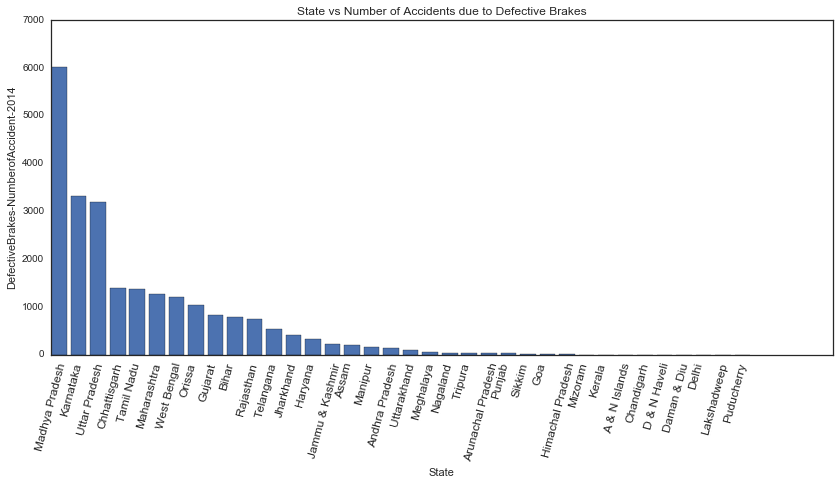

In [13]:
plt.figure(figsize=(14, 6))
def_brake_accident_2014 = vehicle_defect_df[['State', 'DefectiveBrakes-NumberofAccident-2014']]
sorted_df = def_brake_accident_2014.sort_values(['DefectiveBrakes-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['DefectiveBrakes-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=75, fontsize='large')
plt.xlabel('State')
plt.ylabel('DefectiveBrakes-NumberofAccident-2014')
plt.title('State vs Number of Accidents due to Defective Brakes')

In [14]:
#Impact of Lanes on Accidents
def_vs_accidents_df = pd.melt(vehicle_defect_df, id_vars=['State'], value_vars=['DefectiveBrakes-NumberofAccident-2014','DefectiveSteering-NumberofAccident-2014','PuncturedBurstTypres-NumberofAccident-2014','BaldTyres-NumberofAccident-2014','OtherSeriousMechanicalDefect-NumberofAccident-2014'])
def_vs_accidents_df.columns = ['State','DefectType','NumOfAccident']
def_vs_accidents_df.head()

,State,DefectType,NumOfAccident
0,Andhra Pradesh,DefectiveBrakes-NumberofAccident-2014,150.0
1,Arunachal Pradesh,DefectiveBrakes-NumberofAccident-2014,41.0
2,Assam,DefectiveBrakes-NumberofAccident-2014,205.0
3,Bihar,DefectiveBrakes-NumberofAccident-2014,793.0
4,Chhattisgarh,DefectiveBrakes-NumberofAccident-2014,1396.0


In [15]:
#Group lane wise accidents counts by state
def_vs_accidents_grp = def_vs_accidents_df.groupby(['State','DefectType']).sum()
def_vs_accidents_grp.head()

NumOfAccident
State         DefectType                                                       
A & N Islands BaldTyres-NumberofAccident-2014                               0.0
              DefectiveBrakes-NumberofAccident-2014                         0.0
              DefectiveSteering-NumberofAccident-2014                       0.0
              OtherSeriousMechanicalDefect-NumberofAccident-2014            0.0
              PuncturedBurstTypres-NumberofAccident-2014                    0.0

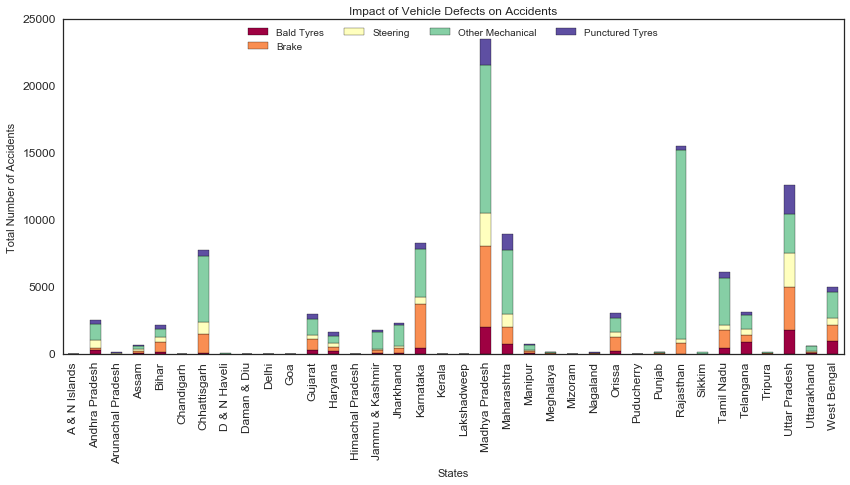

In [29]:
#Visualize accident counts for each state - Lane wise accident counts should be stacked up
#Colormap reference
#https://matplotlib.org/examples/color/colormaps_reference.html
#cmap = cm.get_cmap('seismic') # Colour map (there are many others)
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
defect_plot = def_vs_accidents_grp.unstack().plot(figsize=(14,6), kind='bar',stacked=True,title="Impact of Vehicle Defects on Accidents", fontsize='large', cmap=cmap)
defect_plot.set_xlabel("States")
defect_plot.set_ylabel("Total Number of Accidents")
defect_plot.legend(["Bald Tyres","Brake","Steering","Other Mechanical", "Punctured Tyres"], loc=9,ncol=4)

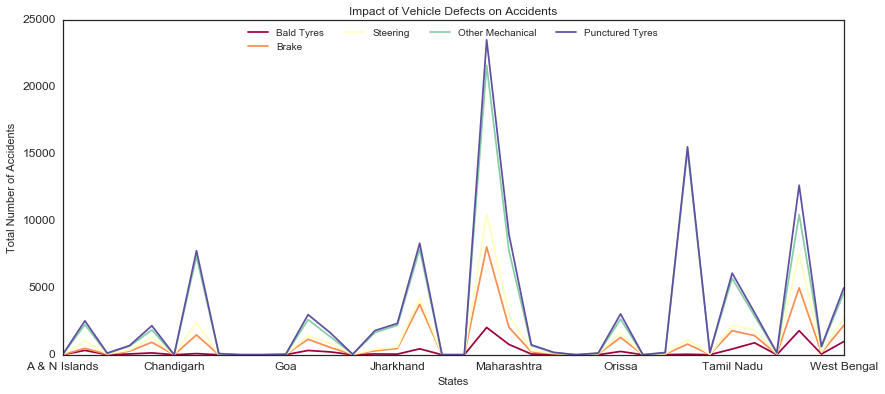

In [30]:
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
#Q.How to give each point a name?
defect_plot = def_vs_accidents_grp.unstack().plot(figsize=(14,6), kind='line',stacked=True,title="Impact of Vehicle Defects on Accidents", fontsize='large', cmap=cmap)
defect_plot.set_xlabel("States")
defect_plot.set_ylabel("Total Number of Accidents")
defect_plot.legend(["Bald Tyres","Brake","Steering","Other Mechanical", "Punctured Tyres"], loc=9,ncol=4)

In [ ]:
#plt.subplot(2,4,i+1)
#Impact of Lanes on Accidents
def_vs_accidents_df = pd.melt(vehicle_defect_df, id_vars=['State'], value_vars=['DefectiveBrakes-NumberofAccident-2014','DefectiveSteering-NumberofAccident-2014','PuncturedBurstTypres-NumberofAccident-2014','BaldTyres-NumberofAccident-2014','OtherSeriousMechanicalDefect-NumberofAccident-2014'])
def_vs_accidents_df.columns = ['State','DefectType','NumOfAccident']
def_vs_accidents_df.head()


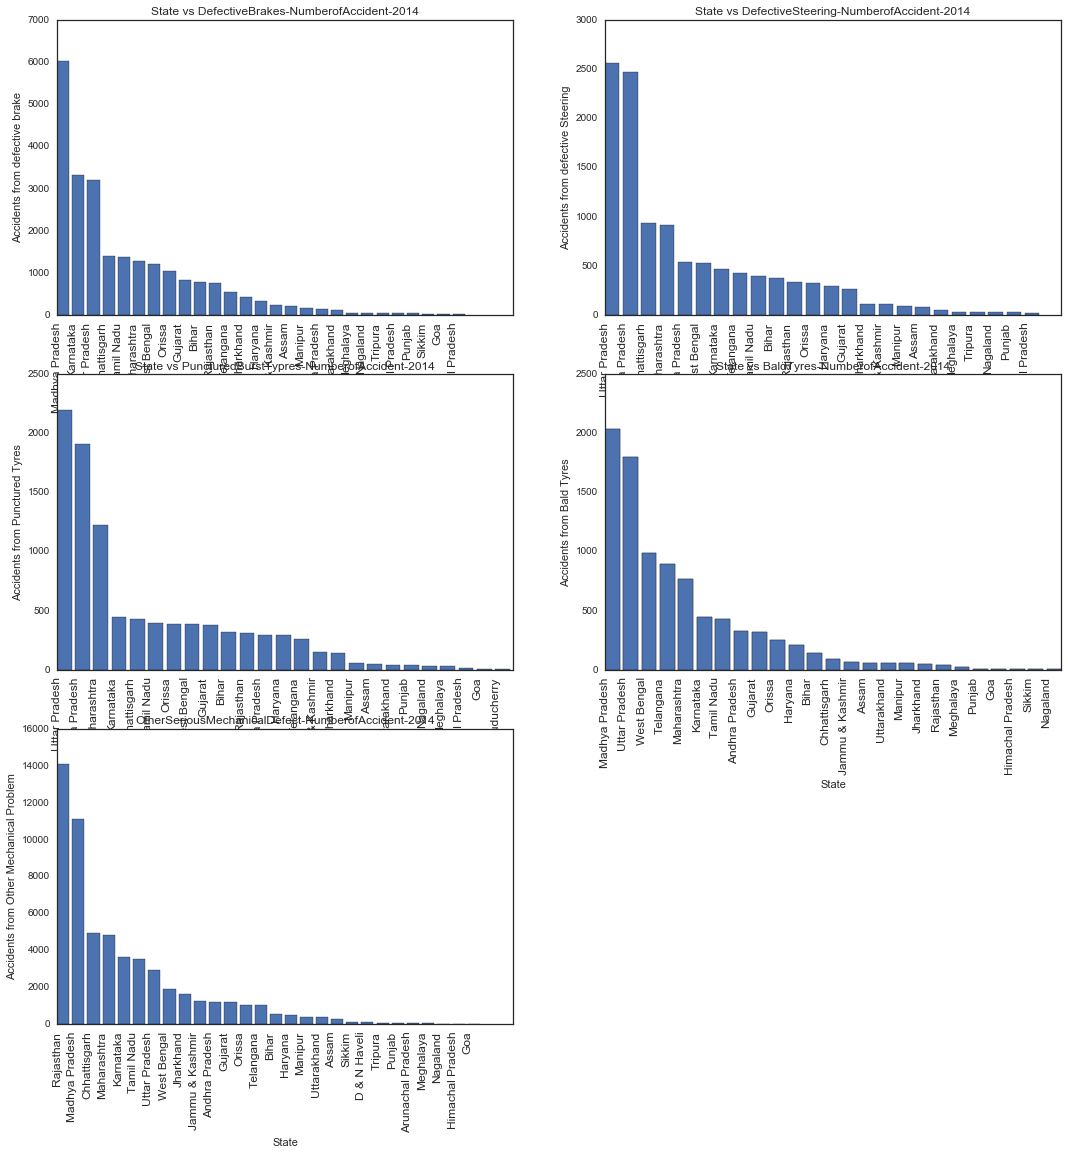

In [49]:
plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
def_brake = vehicle_defect_df[['State','DefectiveBrakes-NumberofAccident-2014']]
#12.75 is 25 Percentile
def_brake_majority = def_brake[def_brake['DefectiveBrakes-NumberofAccident-2014'] > 12]
#def_brake_majority
sorted_df = def_brake_majority.sort_values(['DefectiveBrakes-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['DefectiveBrakes-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('Accidents from defective brake')
plt.title('State vs DefectiveBrakes-NumberofAccident-2014')


plt.subplot(3,2,2)
def_brake = vehicle_defect_df[['State','DefectiveSteering-NumberofAccident-2014']]
#12.75 is 25 Percentile
def_brake_majority = def_brake[def_brake['DefectiveSteering-NumberofAccident-2014'] >= 1]
#def_brake_majority
sorted_df = def_brake_majority.sort_values(['DefectiveSteering-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['DefectiveSteering-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('Accidents from defective Steering')
plt.title('State vs DefectiveSteering-NumberofAccident-2014')


plt.subplot(3,2,3)
def_brake = vehicle_defect_df[['State','PuncturedBurstTypres-NumberofAccident-2014']]
#12.75 is 25 Percentile
def_brake_majority = def_brake[def_brake['PuncturedBurstTypres-NumberofAccident-2014'] >= 1]
#def_brake_majority
sorted_df = def_brake_majority.sort_values(['PuncturedBurstTypres-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['PuncturedBurstTypres-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('Accidents from Punctured Tyres')
plt.title('State vs PuncturedBurstTypres-NumberofAccident-2014')


plt.subplot(3,2,4)
def_brake = vehicle_defect_df[['State','BaldTyres-NumberofAccident-2014']]
#12.75 is 25 Percentile
def_brake_majority = def_brake[def_brake['BaldTyres-NumberofAccident-2014'] >= 1]
#def_brake_majority
sorted_df = def_brake_majority.sort_values(['BaldTyres-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['BaldTyres-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('Accidents from Bald Tyres')
plt.title('State vs BaldTyres-NumberofAccident-2014')

plt.subplot(3,2,4)
def_brake = vehicle_defect_df[['State','BaldTyres-NumberofAccident-2014']]
#12.75 is 25 Percentile
def_brake_majority = def_brake[def_brake['BaldTyres-NumberofAccident-2014'] >= 1]
#def_brake_majority
sorted_df = def_brake_majority.sort_values(['BaldTyres-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['BaldTyres-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('Accidents from Bald Tyres')
plt.title('State vs BaldTyres-NumberofAccident-2014')


plt.subplot(3,2,5)
def_brake = vehicle_defect_df[['State','OtherSeriousMechanicalDefect-NumberofAccident-2014']]
#12.75 is 25 Percentile
def_brake_majority = def_brake[def_brake['OtherSeriousMechanicalDefect-NumberofAccident-2014'] >= 1]
#def_brake_majority
sorted_df = def_brake_majority.sort_values(['OtherSeriousMechanicalDefect-NumberofAccident-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['OtherSeriousMechanicalDefect-NumberofAccident-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('Accidents from Other Mechanical Problem')
plt.title('OtherSeriousMechanicalDefect-NumberofAccident-2014')


In [ ]:
#ToDo:
#Adjusting of subplots
#https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

In [56]:
#Analysis of Seriousness of accident
vehicle_defect_df_no_brk_acc = vehicle_defect_df[vehicle_defect_df['DefectiveBrakes-NumberofAccident-2014'] > 0]
vehicle_defect_df_no_brk_acc['brakes-kill-ratio'] = vehicle_defect_df_no_brk_acc['DefectiveBrakes-PersonsKilled-2014'] / vehicle_defect_df_no_brk_acc['DefectiveBrakes-NumberofAccident-2014'] 
vehicle_defect_df_no_brk_acc['brakes-kill-ratio'].head()



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    0.513333
1    0.609756
2    0.370732
3    0.517024
4    0.295129
Name: brakes-kill-ratio, dtype: float64

In [57]:
#Analysis of Seriousness of accident : brakes-kill-ratio
vehicle_defect_df['brakes-kill-ratio'] = vehicle_defect_df['DefectiveBrakes-PersonsKilled-2014'] / vehicle_defect_df['DefectiveBrakes-NumberofAccident-2014'] 
vehicle_defect_df['brakes-kill-ratio'].head()

0    0.513333
1    0.609756
2    0.370732
3    0.517024
4    0.295129
Name: brakes-kill-ratio, dtype: float64

In [61]:
#Analysis of Seriousness of accident : brakes-injured-ratio
vehicle_defect_df['brakes-injured-ratio'] = vehicle_defect_df['DefectiveBrakes-PersonsInjured-2014'] / vehicle_defect_df['DefectiveBrakes-NumberofAccident-2014'] 
vehicle_defect_df['brakes-injured-ratio'].head()

0    12.133333
1     1.390244
2     1.004878
3     0.665826
4     0.992837
Name: brakes-injured-ratio, dtype: float64

In [60]:
#Analysis of Seriousness of accident : steering-kill-ratio
vehicle_defect_df['steering-kill-ratio'] = vehicle_defect_df['DefectiveSteering-PersonsKilled-2014'] / vehicle_defect_df['DefectiveSteering-NumberofAccident-2014'] 
vehicle_defect_df['steering-kill-ratio'].head()

0    0.289668
1    0.789474
2    0.304878
3    0.438830
4    0.262876
Name: steering-kill-ratio, dtype: float64

In [62]:
#Analysis of Seriousness of accident : steering-injured-ratio
vehicle_defect_df['steering-injured-ratio'] = vehicle_defect_df['DefectiveSteering-PersonsInjured-2014'] / vehicle_defect_df['DefectiveSteering-NumberofAccident-2014'] 
vehicle_defect_df['steering-injured-ratio'].head()

0    0.808118
1    2.368421
2    0.804878
3    0.742021
4    0.916309
Name: steering-injured-ratio, dtype: float64

In [63]:
#Analysis of Seriousness of accident : bursttyres-kill-ratio
vehicle_defect_df['bursttyres-kill-ratio'] = vehicle_defect_df['PuncturedBurstTypres-PersonsKilled-2014'] / vehicle_defect_df['PuncturedBurstTypres-NumberofAccident-2014'] 
vehicle_defect_df['bursttyres-kill-ratio'].head()

0    0.279863
1    0.562500
2    0.333333
3    0.493631
4    0.283372
Name: bursttyres-kill-ratio, dtype: float64

In [64]:
#Analysis of Seriousness of accident : bursttyres-injured-ratio
vehicle_defect_df['bursttyres-injured-ratio'] = vehicle_defect_df['PuncturedBurstTypres-PersonsInjured-2014'] / vehicle_defect_df['PuncturedBurstTypres-NumberofAccident-2014'] 
vehicle_defect_df['bursttyres-injured-ratio'].head()

0    1.283276
1    2.187500
2    1.437500
3    0.847134
4    1.004684
Name: bursttyres-injured-ratio, dtype: float64

In [65]:
#Analysis of Seriousness of accident : baldtyres-kill-ratio
vehicle_defect_df['baldtyres-kill-ratio'] = vehicle_defect_df['BaldTyres-PersonsKilled-2014'] / vehicle_defect_df['BaldTyres-NumberofAccident-2014'] 
vehicle_defect_df['baldtyres-kill-ratio'].head()

0    0.382263
1         NaN
2    0.254237
3    0.496350
4    0.290698
Name: baldtyres-kill-ratio, dtype: float64

In [66]:
#Analysis of Seriousness of accident : baldtyres-injured-ratio
vehicle_defect_df['baldtyres-injured-ratio'] = vehicle_defect_df['BaldTyres-PersonsInjured-2014'] / vehicle_defect_df['BaldTyres-NumberofAccident-2014'] 
vehicle_defect_df['baldtyres-injured-ratio'].head()

0    1.223242
1         NaN
2    1.305085
3    0.759124
4    1.476744
Name: baldtyres-injured-ratio, dtype: float64

In [67]:
#Analysis of Seriousness of accident : other-kill-ratio
vehicle_defect_df['other-kill-ratio'] = vehicle_defect_df['OtherSeriousMechanicalDefect-PersonsKilled-2014'] / vehicle_defect_df['OtherSeriousMechanicalDefect-NumberofAccident-2014'] 
vehicle_defect_df['other-kill-ratio'].head()

0    0.435708
1    0.422222
2    0.359589
3    0.494505
4    0.283916
Name: other-kill-ratio, dtype: float64

In [77]:
#Analysis of Seriousness of accident : other-injured-ratio
vehicle_defect_df['other-injured-ratio'] = vehicle_defect_df['OtherSeriousMechanicalDefect-PersonsInjured-2014'] / vehicle_defect_df['OtherSeriousMechanicalDefect-NumberofAccident-2014'] 
vehicle_defect_df['other-injured-ratio'].head()

0    2.476658
1    1.088889
2    0.880137
3    0.902930
4    0.883631
Name: other-injured-ratio, dtype: float64

In [87]:
accident_severity_df = vehicle_defect_df[['State','brakes-kill-ratio', 'brakes-injured-ratio', 'bursttyres-kill-ratio', 'bursttyres-injured-ratio', 'baldtyres-kill-ratio', 'baldtyres-injured-ratio', 'other-kill-ratio', 'other-injured-ratio']].fillna(0)
print(type(accident_severity_df))
accident_severity_melted_df = pd.melt(accident_severity_df, id_vars=['State'], value_vars=['brakes-kill-ratio', 'brakes-injured-ratio', 'bursttyres-kill-ratio', 'bursttyres-injured-ratio', 'baldtyres-kill-ratio', 'baldtyres-injured-ratio', 'other-kill-ratio', 'other-injured-ratio'])
accident_severity_melted_df.columns = ['State','FatalityVar','FatalityIndex']
accident_severity_melted_df.head()
#accident_severity_grp = accident_severity_df.groupby('State').sum()
#accident_severity_grp


<class 'pandas.core.frame.DataFrame'>


,State,FatalityVar,FatalityIndex
0,Andhra Pradesh,brakes-kill-ratio,0.513333
1,Arunachal Pradesh,brakes-kill-ratio,0.609756
2,Assam,brakes-kill-ratio,0.370732
3,Bihar,brakes-kill-ratio,0.517024
4,Chhattisgarh,brakes-kill-ratio,0.295129


In [ ]:
#ToDo
#Select top 10 states according to FatalityVar/FatalityIndex pair and plot 5 bar graph for each state

#


In [93]:
#Let's look at overall fatality of accidents because of different cause
vehicle_defect_total_df['brakes-kill-ratio'] = vehicle_defect_total_df['DefectiveBrakes-PersonsKilled-2014'] / vehicle_defect_total_df['DefectiveBrakes-NumberofAccident-2014'] 
vehicle_defect_total_df['brakes-injured-ratio'] = vehicle_defect_total_df['DefectiveBrakes-PersonsInjured-2014'] / vehicle_defect_total_df['DefectiveBrakes-NumberofAccident-2014'] 

vehicle_defect_total_df['steering-kill-ratio'] = vehicle_defect_total_df['DefectiveSteering-PersonsKilled-2014'] / vehicle_defect_total_df['DefectiveSteering-NumberofAccident-2014'] 
vehicle_defect_total_df['steering-injured-ratio'] = vehicle_defect_total_df['DefectiveSteering-PersonsInjured-2014'] / vehicle_defect_total_df['DefectiveSteering-NumberofAccident-2014'] 

vehicle_defect_total_df['bursttyres-kill-ratio'] = vehicle_defect_total_df['PuncturedBurstTypres-PersonsKilled-2014'] / vehicle_defect_total_df['PuncturedBurstTypres-NumberofAccident-2014'] 
vehicle_defect_total_df['bursttyres-injured-ratio'] = vehicle_defect_total_df['PuncturedBurstTypres-PersonsInjured-2014'] / vehicle_defect_total_df['PuncturedBurstTypres-NumberofAccident-2014'] 

vehicle_defect_total_df['baldtyres-kill-ratio'] = vehicle_defect_total_df['BaldTyres-PersonsKilled-2014'] / vehicle_defect_total_df['BaldTyres-NumberofAccident-2014'] 
vehicle_defect_total_df['baldtyres-injured-ratio'] = vehicle_defect_total_df['BaldTyres-PersonsInjured-2014'] / vehicle_defect_total_df['BaldTyres-NumberofAccident-2014'] 

vehicle_defect_total_df['other-kill-ratio'] = vehicle_defect_total_df['OtherSeriousMechanicalDefect-PersonsKilled-2014'] / vehicle_defect_total_df['OtherSeriousMechanicalDefect-NumberofAccident-2014'] 
vehicle_defect_total_df['other-injured-ratio'] = vehicle_defect_total_df['OtherSeriousMechanicalDefect-PersonsInjured-2014'] / vehicle_defect_total_df['OtherSeriousMechanicalDefect-NumberofAccident-2014'] 


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [94]:
vehicle_defect_total_df.head()

,﻿SNo,State,DefectiveBrakes-NumberofAccident-2014,DefectiveBrakes-PersonsKilled-2014,DefectiveBrakes-PersonsInjured-2014,DefectiveSteering-NumberofAccident-2014,DefectiveSteering-PersonsKilled-2014,DefectiveSteering-PersonsInjured-2014,PuncturedBurstTypres-NumberofAccident-2014,PuncturedBurstTypres-PersonsKilled-2014,...,brakes-kill-ratio,brakes-injured-ratio,steering-kill-ratio,steering-injured-ratio,bursttyres-kill-ratio,bursttyres-injured-ratio,baldtyres-kill-ratio,baldtyres-injured-ratio,other-kill-ratio,other-injured-ratio
36,Total,Total,23645.0,7179.0,26237.0,11430.0,3746.0,10713.0,9748.0,3371.0,...,0.303616,1.109621,0.327734,0.93727,0.345815,0.931576,0.341642,0.93309,0.329149,0.963504


In [98]:
vehicle_defect_total_melted_df = pd.melt(vehicle_defect_total_df, value_vars=['brakes-kill-ratio', 'brakes-injured-ratio', 'bursttyres-kill-ratio', 'bursttyres-injured-ratio', 'baldtyres-kill-ratio', 'baldtyres-injured-ratio', 'other-kill-ratio', 'other-injured-ratio'])
vehicle_defect_total_melted_df.columns = ['FatalityType', 'FatalityIndex']
vehicle_defect_total_melted_df

,FatalityType,FatalityIndex
0,brakes-kill-ratio,0.303616
1,brakes-injured-ratio,1.109621
2,bursttyres-kill-ratio,0.345815
3,bursttyres-injured-ratio,0.931576
4,baldtyres-kill-ratio,0.341642
5,baldtyres-injured-ratio,0.933090
6,other-kill-ratio,0.329149
7,other-injured-ratio,0.963504


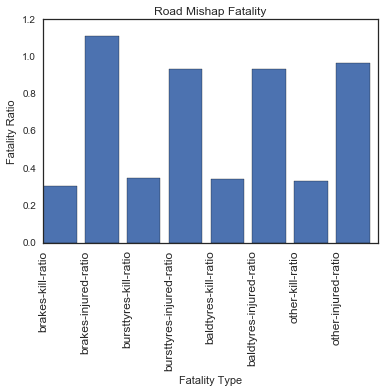

In [99]:
#vehicle_defect_total_melted_df.plot(kind='bar')
y_pos = np.arange(len(vehicle_defect_total_melted_df['FatalityType']))
plt.bar(y_pos, vehicle_defect_total_melted_df['FatalityIndex'])
plt.xticks(y_pos, vehicle_defect_total_melted_df['FatalityType'], rotation=90, fontsize='large')
plt.xlabel('Fatality Type')
plt.ylabel('Fatality Ratio')
plt.title('Road Mishap Fatality')